In [1]:
# 1D
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# Define the parameters
D = 1.0  # Diffusion Coefficient
L = 1.0  # length of the rod
N = 100  # number of grid points
dx = L / (N - 1)  # grid spacing in x direction
r = 10 

# Define the initial condition
def initial_condition(x_val):
    return np.sin(np.pi*x_val)

def f(t, u):
    rhs = np.zeros_like(u)
    for i in range(1, N-1):
        uxx = (u[i+1] - 2*u[i] + u[i-1]) / dx**2
        rhs[i] = D*uxx + r*u[i]*(1-u[i])
    # Apply boundary condition u(0) = u(L) = 0
    u[0] = 0
    u[-1] = 0
    return rhs


# Define the grid of points
x = np.linspace(0, L, N)

# Set the initial condition
u0 = initial_condition(x)

# Solve the ODE system
sol = solve_ivp(f, [0, 1], u0, method='RK45', t_eval=np.linspace(0, 1, 1001))

# Plot the solution
plt.plot(x, sol.y[:, 0], label='t=0')
plt.plot(x, sol.y[:, 250], label='t=0.25')
plt.plot(x, sol.y[:, 500], label='t=0.5')
plt.plot(x, sol.y[:, 750], label='t=0.75')
plt.plot(x, sol.y[:, 1000], label='t=1')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Temperature at x=L/2 as a function of time
plt.figure(figsize=(10, 5))
index_L2 = int((N-1)/2)  # index of x=L/2
plt.plot(sol.t, sol.y[index_L2, :])
plt.xlabel('Time')
plt.ylabel('Temperature at x=L/2')
plt.show()


<Figure size 640x480 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

C:\Users\user\Anaconda3\envs\newenvt\lib\site-packages\scipy\integrate\_ivp\common.py:32: UserWarning: The following arguments have no effect for a chosen solver: `args`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


Optimal value of r: 10.240436272187667


C:\Users\user\Anaconda3\envs\newenvt\lib\site-packages\scipy\integrate\_ivp\common.py:32: UserWarning: The following arguments have no effect for a chosen solver: `args`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


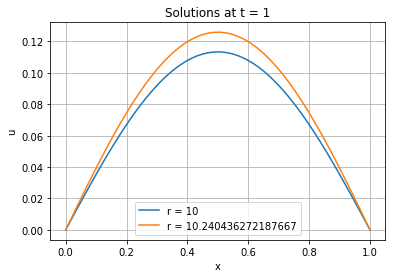

In [26]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from numpy.linalg import norm
from scipy.optimize import minimize

# Define the parameters
D = 1.0  # Diffusion Coefficient
L = 1.0  # length of the rod
N = 50  # number of grid points
dx = L / (N - 1)  # grid spacing in x direction

# Define the initial condition
def initial_condition(x_val):
    return np.sin(np.pi * x_val)

def f(t, u, r_value):
    rhs = np.zeros_like(u)
    for i in range(1, N - 1):
        uxx = (u[i + 1] - 2 * u[i] + u[i - 1]) / dx**2
        rhs[i] = D * uxx + r_value * u[i] * (1 - u[i])
    # Apply boundary condition u(0) = u(L) = 0
    u[0] = 0
    u[-1] = 0
    return rhs

# Define the grid of points
x = np.linspace(0, L, N)

# Set the initial condition
u0 = initial_condition(x)

# List to store the solutions
solutions = []

# Range of r values
r_min = 6
r_max = 15
num_r_values = 100
r_values = np.linspace(r_min, r_max, num_r_values)

# Solve the ODE system for different r values
for r_value in r_values:
    # Solve the ODE system for r_value
    sol = solve_ivp(lambda t, u: f(t, u, r_value), [0, 1], u0, method='BDF', args=(r_value,), t_eval=[1])

    # Save the solution at t=1 for the current r_value
    solutions.append(sol.y[:, -1])

index_r10=np.where(r_values==10)[0][0]
save_r_val = solutions[index_r10]

alpha = 0.00001

# Define the Tikhnov function
def tikhnov(r_value):
    #index = np.where(r_values == r_value)[0][0]
    index =np.argmin(np.abs(r_values - r_value))
    u_t1 = solutions[index]
    return norm(save_r_val - u_t1) ** 2 + alpha * r_value ** 2

# Set the initial guess for the optimization
initial_guess =  r_values[np.argmin(np.abs(save_r_val - solutions))]

# Find the value of r that minimizes the Tikhnov function
res = minimize(tikhnov, x0=np.array([initial_guess]), method='BFGS')
r_opt = res.x[0]

# Print the optimal value of r
print("Optimal value of r:", r_opt)

# Solve the ODE system for r=10 and r=r_opt
sol_r_10 = solve_ivp(lambda t, u: f(t, u, 10), [0, 1], u0, method='RK45', args=(10,))
sol_r_opt = solve_ivp(lambda t, u: f(t, u, r_opt), [0, 1], u0, method='RK45', args=(r_opt,))

# Plot the solutions
plt.plot(x, sol_r_10.y[:, -1], label='r = 10')
plt.plot(x, sol_r_opt.y[:, -1], label='r = {}'.format(r_opt))
plt.xlabel('x')
plt.ylabel('u')
plt.title('Solutions at t = 1')
plt.legend()
plt.grid(True)
plt.show()



In [21]:
#try
import numpy as np
from scipy.integrate import solve_ivp
from numpy.linalg import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the parameters
D = 1.0  # Diffusion Coefficient
L = 1.0  # length of the rod
N = 50  # number of grid points
dx = L / (N - 1)  # grid spacing in x direction

# Define the initial condition
def initial_condition(x_val):
    return np.sin(np.pi * x_val)

def f(t, u, r_value):
    rhs = np.zeros_like(u)
    for i in range(1, N - 1):
        uxx = (u[i + 1] - 2 * u[i] + u[i - 1]) / dx**2
        rhs[i] = D * uxx + r_value * u[i] * (1 - u[i])
    # Apply boundary condition u(0) = u(L) = 0
    u[0] = 0
    u[-1] = 0
    return rhs

# Define the grid of points
x = np.linspace(0, L, N)

# Set the initial condition
u0 = initial_condition(x)

# List to store the solutions
solutions = []

# Range of r values
r_min = 6
r_max = 15
num_r_values = 100
r_values = np.linspace(r_min, r_max, num_r_values)

# Solve the ODE system for different r values
for r_value in r_values:
    # Solve the ODE system for r_value
    sol = solve_ivp(lambda t, u: f(t, u, r_value), [0, 1], u0, method='BDF', args=(r_value,), t_eval=[1])

    # Save the solution at t=1 for the current r_value
    solutions.append(sol.y[:, -1])

index_r10 = np.where(r_values == 10)[0][0]
save_r_val = solutions[index_r10]

alpha = 0.1

# Define the Tikhnov function
def tikhnov(r_value):
    index = np.where(r_values == r_value)[0][0]
    u_t1 = solutions[index]
    return norm(save_r_val - u_t1) ** 2 + alpha * r_value ** 2

initial_guess = 10.0

# Find the value of r that minimizes the Tikhnov function
res = minimize(tikhnov, x0=np.array([initial_guess]), method='BFGS')
r_opt = res.x[0]

# Print the optimal value of r
print("Optimal value of r:", r_opt)

# Solve the ODE system for r=10 and r=r_opt
sol_r_10 = solve_ivp(lambda t, u: f(t, u, 10), [0, 1], u0, method='RK45', args=(10,))
sol_r_opt = solve_ivp(lambda t, u: f(t, u, r_opt), [0, 1], u0, method='RK45', args=(r_opt,))

# Plot the solutions
plt.plot(x, sol_r_10.y[:, -1], label='r = 10')
plt.plot(x, sol_r_opt.y[:, -1], label='r = {}'.format(r_opt))
plt.xlabel('x')
plt.ylabel('u')
plt.title('Solutions at t = 1')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\user\Anaconda3\envs\newenvt\lib\site-packages\scipy\integrate\_ivp\common.py:32: UserWarning: The following arguments have no effect for a chosen solver: `args`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


IndexError: index 0 is out of bounds for axis 0 with size 0

C:\Users\user\Anaconda3\envs\newenvt\lib\site-packages\scipy\integrate\_ivp\common.py:32: UserWarning: The following arguments have no effect for a chosen solver: `args`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


Optimization terminated successfully.
         Current function value: 0.000991
         Iterations: 18
         Function evaluations: 37
Optimal value of r: 9.95458984375


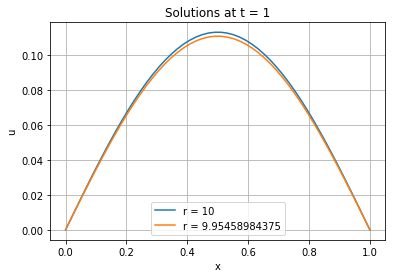

In [30]:
# Working ok
import numpy as np
from scipy.integrate import solve_ivp
from numpy.linalg import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the parameters
D = 1.0  # Diffusion Coefficient
L = 1.0  # length of the rod
N = 50  # number of grid points
dx = L / (N - 1)  # grid spacing in x direction

# Define the initial condition
def initial_condition(x_val):
    return np.sin(np.pi * x_val)

def f(t, u, r_value):
    rhs = np.zeros_like(u)
    for i in range(1, N - 1):
        uxx = (u[i + 1] - 2 * u[i] + u[i - 1]) / dx**2
        rhs[i] = D * uxx + r_value * u[i] * (1 - u[i])
    # Apply boundary condition u(0) = u(L) = 0
    u[0] = 0
    u[-1] = 0
    return rhs

# Define the grid of points
x = np.linspace(0, L, N)

# Set the initial condition
u0 = initial_condition(x)

# List to store the solutions
solutions = []

# Range of r values
r_min = 6
r_max = 15
num_r_values = 100
r_values = np.linspace(r_min, r_max, num_r_values)

# Solve the ODE system for different r values
for r_value in r_values:
    # Solve the ODE system for r_value
    sol = solve_ivp(lambda t, u: f(t, u, r_value), [0, 1], u0, method='BDF', args=(r_value,), t_eval=[1])

    # Save the solution at t=1 for the current r_value
    solutions.append(sol.y[:, -1])

index_r10 = np.where(r_values == 10)[0][0]
save_r_val = solutions[index_r10]

alpha = 0.00001

# Define the Tikhnov function
def tikhnov(r_value):
    norm_L2 = norm(save_r_val - solutions[np.argmin(np.abs(r_values - r_value))])**2 + alpha * r_value**2
    return norm_L2

initial_guess = 10 #r_values[np.argmin(np.abs(save_r_val - solutions))]

# Find the value of r that minimizes the Tikhnov function
res = minimize(tikhnov, x0=np.array([initial_guess]), method='Nelder-Mead',options={'disp':True})
r_opt = res.x[0]

# Print the optimal value of r
print("Optimal value of r:", r_opt)

# Solve the ODE system for r=10 and r=10.45
sol_r_10 = solve_ivp(lambda t, u: f(t, u, 10), [0, 1], u0, method='RK45', args=(10,))
sol_r_opt = solve_ivp(lambda t, u: f(t, u, r_opt), [0, 1], u0, method='RK45', args=(r_opt,))

# Plot the solutions
plt.plot(x, sol_r_10.y[:, -1], label='r = 10')
plt.plot(x, sol_r_opt.y[:, -1], label='r = {}'.format(r_opt))
plt.xlabel('x')
plt.ylabel('u')
plt.title('Solutions at t = 1')
plt.legend()
plt.grid(True)
plt.show()


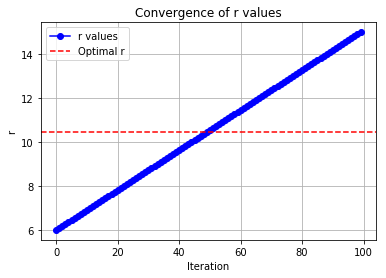

In [71]:
# Plot the convergence of r values
plt.figure()
plt.plot(range(len(r_values)), r_values, 'bo-', label='r values')
plt.axhline(y=r_opt, color='r', linestyle='--', label='Optimal r')
plt.xlabel('Iteration')
plt.ylabel('r')
plt.title('Convergence of r values')
plt.legend()
plt.grid(True)
plt.show()

In [58]:
r_values

array([ 6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27272727,
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ,
       10.09090909, 10.18181818, 10.27272727, 10.36363636, 10.45454545,
       10.54545455, 10.63636364, 10.72727273, 10.81818182, 10.90909091,
       11.        , 11.09090909, 11.18181818, 11.27272727, 11.36363636,
       11.45454545, 11.54545455, 11.63636364, 11.72727273, 11.81818182,
       11.90909091, 12.        , 12.09090909, 12.18181818, 12.27

In [66]:
indx_10=np.where(r_values==10)
indx_10[0][0]

44

C:\Users\user\Anaconda3\envs\newenvt\lib\site-packages\scipy\integrate\_ivp\common.py:32: UserWarning: The following arguments have no effect for a chosen solver: `args`.
  .format(", ".join("`{}`".format(x) for x in extraneous)))


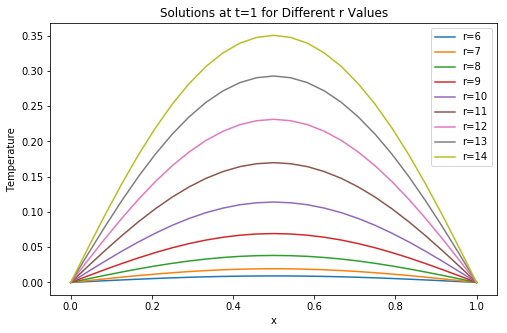

In [31]:
# Tiknohov 1D
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy.linalg import norm

# Define the parameters
D = 1.0  # Diffusion Coefficient
L = 1.0  # length of the rod
N = 25  # number of grid points
dx = L / (N - 1)  # grid spacing in x direction

# Define the initial condition
def initial_condition(x_val):
    return np.sin(np.pi * x_val)

def f(t, u, r_value):
    rhs = np.zeros_like(u)
    for i in range(1, N - 1):
        uxx = (u[i + 1] - 2 * u[i] + u[i - 1]) / dx**2
        rhs[i] = D * uxx + r_value * u[i] * (1 - u[i])
    # Apply boundary condition u(0) = u(L) = 0
    u[0] = 0
    u[-1] = 0
    return rhs

# Define the grid of points
x = np.linspace(0, L, N)

# Set the initial condition
u0 = initial_condition(x)

# List to store the solutions
solutions = []
norm_L2=[]

# Range of r values
r_values = [6,7,8,9, 10, 11,12,13,14]

# Solve the ODE system for different r values
for r_value in r_values:
    # Solve the ODE system for r_value
    sol = solve_ivp(lambda t,u: f(t,u,r_value), [0, 1], u0, method='RK45', args=(r_value,), t_eval=[1])
    
    # Save the solution at t=1 for the current r_value
    solutions.append(sol.y[:, -1])
    
save_r_val=solutions[1]

alpha=0.01

# Tikhnov Function
for j in range (len(r_values)):
    solutions[j]=solutions[j]
    norm_L2.append(norm(save_r_val-solutions[j])+alpha*r_values[j])

#def tiknoh():   

# Print the solutions for all r values
"""for i in range(len(r_values)):
    r_value = r_values[i]
    print("Solution at t=1 for r=",r_value)
    print(solutions[i])
    print() # empty space """

# Plot the solutions
plt.figure(figsize=(8, 5))
for i in range(len(r_values)):
    r_value = r_values[i]
    plt.plot(x, solutions[i], label='r={}'.format(r_value))
plt.xlabel('x')
plt.ylabel('Temperature')
plt.legend()
plt.title('Solutions at t=1 for Different r Values')
plt.show()


Optimal value of r: [0.00065413]


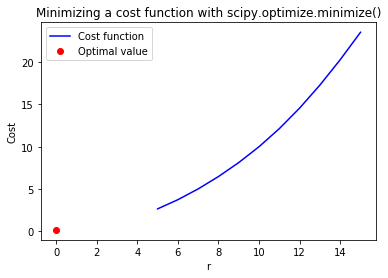

In [55]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the parameters
D = 1.0  # Diffusion Coefficient
L = 1.0  # length of the rod
N = 25  # number of grid points
dx = L / (N - 1)  # grid spacing in x direction
r_obs = 10  # observed value of r
t_obs = 1  # observed value of t
u_obs = None  # observed solution

# Define the initial condition
def initial_condition(x_val):
    return np.sin(np.pi*x_val)

# Define the function for the PDE
def f(t, u, r):
    rhs = np.zeros_like(u)
    for i in range(1, N-1):
        uxx = (u[i+1] - 2*u[i] + u[i-1]) / dx**2
        rhs[i] = D*uxx + r*u[i]*(1-u[i])
    # Apply boundary condition u(0) = u(L) = 0
    rhs[0] = 0
    rhs[-1] = 0
    return rhs

# Define the grid of points
x = np.linspace(0, L, N)

# Set the initial condition
u0 = initial_condition(x)

# Solve the ODE system for r=10 and save the solution
sol_obs = solve_ivp(lambda t,u: f(t,u,r_obs), [0, t_obs], u0, method='RK45')
u_obs = sol_obs.y[:, -1]

# Define the cost function
def cost_function(r, lambda_reg):
    sol = solve_ivp(lambda t,u: f(t,u,r), [0, t_obs], u0, method='RK45')
    u = sol.y[:, -1]
    return np.linalg.norm(u - u_obs)**2 + lambda_reg*r**2

# Define the range of values for r
r_range = np.linspace(5, 15, 11)

# Define the regularization parameter
lambda_reg = 0.1

# Minimize the cost function for each value of r
r_opt = None
cost_opt = np.inf
for r in r_range:
    res = minimize(cost_function, r, args=(lambda_reg,), method='CG')
    if res.fun < cost_opt:
        r_opt = res.x
        cost_opt = res.fun

# Print the optimal value of r
print('Optimal value of r:', r_opt)

# Plot the results
plt.plot(r_range, [cost_function(r, lambda_reg) for r in r_range], 'b-', label='Cost function')
plt.plot(r_opt, cost_opt, 'ro', label='Optimal value')
plt.xlabel('r')
plt.ylabel('Cost')
plt.title('Minimizing a cost function with scipy.optimize.minimize()')
plt.legend()
plt.show()


In [32]:
norm_L2

[0.09538105715065326,
 0.07,
 0.14534575683992093,
 0.2630928941387178,
 0.428459498968472,
 0.6332410073164733,
 0.8585781826781232,
 1.0847876635599487,
 1.2987039378151084]

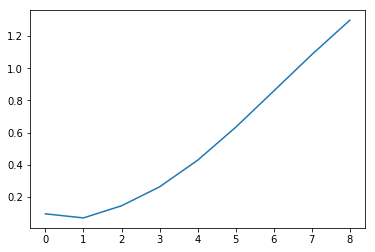

In [23]:
plt.plot(norm_L2)

In [10]:
sol.y[:,-1]

array([0.        , 0.00544653, 0.01090003, 0.01631432, 0.02174973,
       0.02710712, 0.03249999, 0.03777656, 0.04310319, 0.04827589,
       0.05351338, 0.0585601 , 0.06368643, 0.06858606, 0.07358014,
       0.07831264, 0.08315439, 0.08770081, 0.09237118, 0.09671373,
       0.10119469, 0.10531674, 0.10959137, 0.11347747, 0.11752993,
       0.12116585, 0.12498139, 0.12835405, 0.13191903, 0.13501659,
       0.13831846, 0.14113024, 0.14415755, 0.14667405, 0.14941642,
       0.15162931, 0.15407745, 0.15597952, 0.15812521, 0.15971042,
       0.16154648, 0.16280986, 0.16433019, 0.16526789, 0.16646741,
       0.16707666, 0.16795132, 0.16823043, 0.16877725, 0.16872555,
       0.16894256, 0.16856046, 0.16844675, 0.16773569, 0.16729137,
       0.16625384, 0.16548008, 0.16411959, 0.16301864, 0.16133974,
       0.1599149 , 0.15792319, 0.15617887, 0.15388099, 0.15182268,
       0.14922633, 0.14686067, 0.1439746 , 0.14130934, 0.13814339,
       0.13518746, 0.13175254, 0.12851601, 0.12482412, 0.12131

In [18]:
#Tiknov Updated:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# Define the parameters
D = 1.0  # Diffusion Coefficient
L = 1.0  # length of the rod
N = 100  # number of grid points
dx = L / (N - 1)  # grid spacing in x direction

# Define the initial condition
def initial_condition(x_val):
    return np.sin(np.pi * x_val)

def f(t, u, r_value):
    rhs = np.zeros_like(u)
    for i in range(1, N - 1):
        uxx = (u[i + 1] - 2 * u[i] + u[i - 1]) / dx**2
        rhs[i] = D * uxx + r_value * u[i] * (1 - u[i])
    # Apply boundary condition u(0) = u(L) = 0
    u[0] = 0
    u[-1] = 0
    return rhs

# Define the grid of points
x = np.linspace(0, L, N)

# Set the initial condition
u0 = initial_condition(x)

# Solve the ODE system for r=10 and t=1 to obtain the solution
sol_original = solve_ivp(lambda t, u: f(t, u, 10), [0, 1], u0, method='RK45', t_eval=np.linspace(0, 1, 1001))

# Save the solution at t=1 for r=10
u10 = sol_original.y[:, -1]

# List to store the solutions for different r values
solutions = []

# Range of r values
r_values = [9, 10, 11]

# Solve the ODE system for different r values and perform Tikhonov regularization
for r_value in r_values:
    # Define the objective function for Tikhonov regularization
    def objective(r):
        sol = solve_ivp(lambda t, u: f(t, u, r), [0, 1], u0, method='RK45', t_eval=np.linspace(0, 1, 1001))
        u_t1 = sol.y[:, -1]
        return np.linalg.norm(u_t1 - u10) ** 2 + alpha * r ** 2  # Add regularization term
    
    # Set the regularization parameter
    alpha = 0.01
    
    # Minimize the objective function to estimate the value of r
    result = minimize(objective, x0=10, method='BFGS')
    estimated_r = result.x
    
    # Solve the ODE system for the estimated r value
    sol = solve_ivp(lambda t, u: f(t, u, estimated_r), [0, 1], u0, method='RK45', t_eval=np.linspace(0, 1, 1001))
    solutions.append(sol.y[:, -1])

# Print the solutions for all r values
for i in range(len(r_values)):
    r_value = r_values[i]
    print("Solution at t=1 for r={} (Estimated): ".format(r_value))
    print(solutions[i])
    print()

# Plot the solutions
plt.figure(figsize=(8, 5))
for i in range(len(r_values)):
    r_value = r_values[i]
    plt.plot(x, solutions[i], label='r={}'.format(r_value))
plt.xlabel('x')
plt.ylabel('Temperature at t=1')
plt.legend()
plt.show()


KeyboardInterrupt: 

The following code is for 2D format but it takes alot of time to generate an answer as it has nested for loops. Therefore do not execute the code we can optimize it using slicing operators.

In [ ]:
# 2D - takes time
import numpy as np
from scipy.integrate import solve_ivp

# Define the parameters
D = 1.0  # Diffusion Coefficient
L = 1.0  # Length of the domain in x direction
W = 1.0  # Length of the domain in y direction
Nx = 100  # Number of grid points in x direction
Ny = 100  # Number of grid points in y direction
dx = L / (Nx - 1)  # Grid spacing in x direction
dy = W / (Ny - 1)  # Grid spacing in y direction
r = 10

# Define the initial condition
def initial_condition(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)

def f(t, u):
    u = u.reshape((Nx, Ny))
    rhs = np.zeros_like(u)
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            uxx = (u[i+1, j] - 2*u[i, j] + u[i-1, j]) / dx**2
            uyy = (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / dy**2
            rhs[i, j] = D * (uxx + uyy) + r * u[i, j] * (1 - u[i, j])
    # Apply boundary conditions u(0, y) = u(L, y) = 0
    u[0, :] = 0
    u[-1, :] = 0
    # Apply boundary conditions u(x, 0) = u(x, W) = 0
    u[:, 0] = 0
    u[:, -1] = 0
    return rhs.ravel()

# Define the grid of points
x = np.linspace(0, L, Nx)
y = np.linspace(0, W, Ny)
X, Y = np.meshgrid(x, y)

# Set the initial condition
u0 = initial_condition(X, Y).flatten()

# Solve the PDE system
sol = solve_ivp(f, [0, 1], u0, method='RK45', t_eval=np.linspace(0, 1, 15))

# Reshape the solution back to the grid
U = sol.y.reshape((Nx, Ny, -1))

# Plot the solution
import matplotlib.pyplot as plt

plt.plot(x, U[:, int((Ny-1)/2), 0], label='t=0')
plt.plot(x, U[:, int((Ny-1)/2), 250], label='t=0.25')
plt.plot(x, U[:, int((Ny-1)/2), 500], label='t=0.5')
plt.plot(x, U[:, int((Ny-1)/2), 750], label='t=0.75')
plt.plot(x, U[:, int((Ny-1)/2), -1], label='t=1')
plt.xlabel('x')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Temperature at (x=L/2, y=W/2) as a function of time
plt.figure(figsize=(10, 5))
index_L2 = int((Nx-1)/2)  # index of x=L/2
index_W2 = int((Ny-1)/2)  # index of y=W/2
plt.plot(sol.t, U[index_L2, index_W2, :])
plt.xlabel('Time')
plt.ylabel('Temperature at (x=L/2, y=W/2)')
plt.show()


Optimized Fishers 2D code (using Slicing operators) 

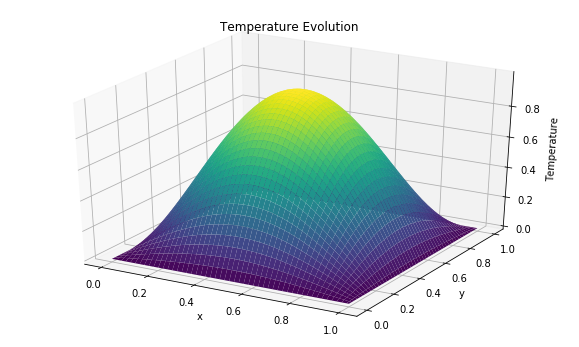

In [5]:
# 2D format with optimized and 3D plot
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the parameters
D = 1.0  # Diffusion Coefficient
L = 1.0  # Length of the domain in x direction
W = 1.0  # Length of the domain in y direction
Nx = 100  # Number of grid points in x direction
Ny = 100  # Number of grid points in y direction
dx = L / (Nx - 1)  # Grid spacing in x direction
dy = W / (Ny - 1)  # Grid spacing in y direction
r = 10

# Define the initial condition
def initial_condition(x, y):
    return np.sin(np.pi * x) * np.sin(np.pi * y)

# Define the PDE system
def f(t, u):
    u = u.reshape((Nx, Ny)) # we pass an 1D array as u but need to reshape for uxx and uyy
    rhs = np.zeros_like(u)

    uxx = (u[2:, 1:-1] - 2*u[1:-1, 1:-1] + u[:-2, 1:-1]) / dx**2
    uyy = (u[1:-1, 2:] - 2*u[1:-1, 1:-1] + u[1:-1, :-2]) / dy**2

    rhs[1:-1, 1:-1] = D * (uxx + uyy) + r * u[1:-1, 1:-1] * (1 - u[1:-1, 1:-1])

    # Apply boundary conditions
    rhs[0, :] = 0
    rhs[-1, :] = 0
    rhs[:, 0] = 0
    rhs[:, -1] = 0

    return rhs.ravel() # Again convert to a 1D array as the return value

# Define the grid of points
x = np.linspace(0, L, Nx)
y = np.linspace(0, W, Ny)
X, Y = np.meshgrid(x, y)

# Set the initial condition
u0 = initial_condition(X, Y).flatten()  # Initial Temperature of all the Grid points using sin function

# Solve the PDE system
sol = solve_ivp(f, [0, 1], u0, method='RK45', t_eval=np.linspace(0, 1, 15)) # method can be 'BDF' and only 15 times as it takes time.

# Reshape the solution to plot
U = sol.y.reshape((Nx, Ny,-1)) # (100,100,15)
 
# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax=plt.axes(projection='3d')

# Plot the 3D surface
ax.plot_surface(X, Y, U[:, :, 0], cmap='viridis') # U[:,:,0] is the temp(sol) of x and y points when t=0
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Temperature')
ax.set_title('Temperature Evolution')
plt.show()
